In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd MyDrive

/content/drive/MyDrive


In [ ]:
!ls

 aaaa					    'License_Plate_Recognition_with_OCR models '
 Aionlinecourse_uday			     new
 AI_Online_Hasib			     new_projects
 All_Documents				    'project pro'
'ChatGPT engineering & Generative AI.gdoc'   Tahsin
'Colab Notebooks'			    ' Transform Your Business with AWS App Studio.gdoc'
'Google AI Studio'			     Untitled0.ipynb
'image(mim)'				    'Untitled document.gdoc'
 img


In [ ]:
%cd new_projects/

/content/drive/MyDrive/new_projects


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="PYIrYvf8WFPOSaItVRYl")
project = rf.workspace("graduation-project-2023").project("plants-diseases-detection-and-classification")
version = project.version(12)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.75, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Plants-Diseases-Detection-and-Classification-12 in yolov8:: 100%|██████████| 5044/5044 [00:43<00:00, 114.96it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.76 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/201.2 GB disk)


In [ ]:
!yolo train model=yolov8n.pt data="/content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/data.yaml" epochs=100 imgsz=640

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save

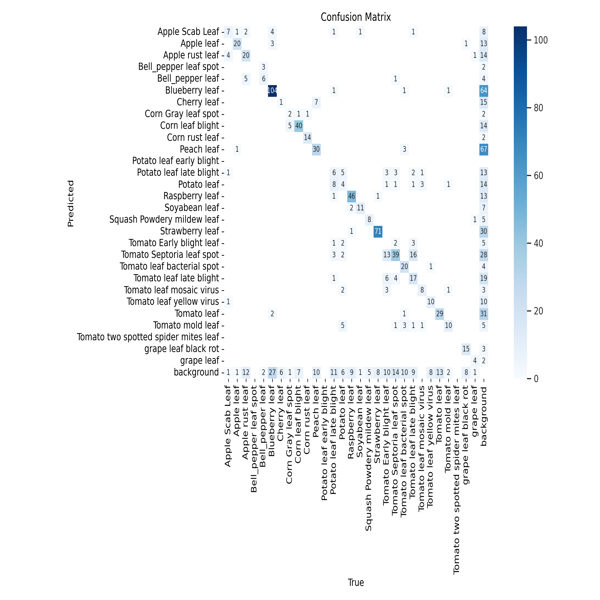

In [ ]:
from PIL import Image
Image.open(f'/content/drive/MyDrive/new_projects/runs/detect/train3/confusion_matrix.png').resize((600,600))

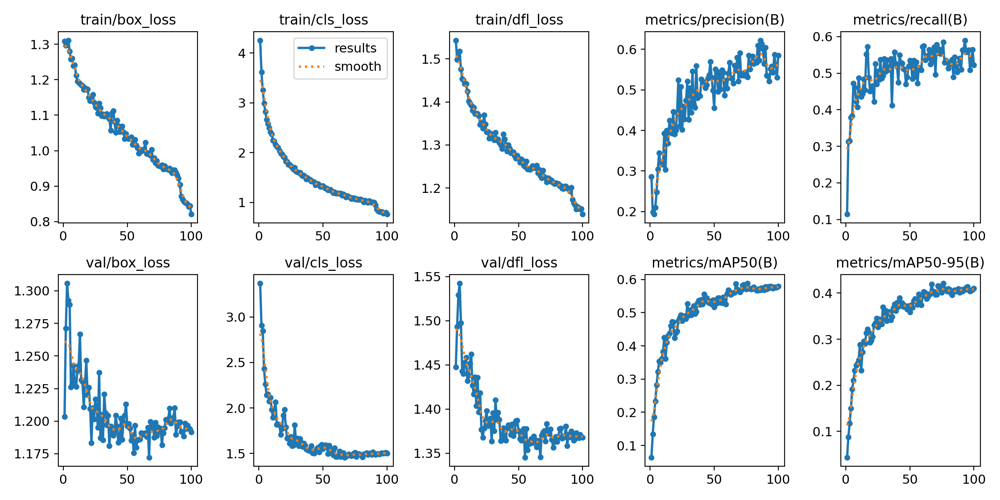

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/runs/detect/train3/results.png').resize((1000,500))

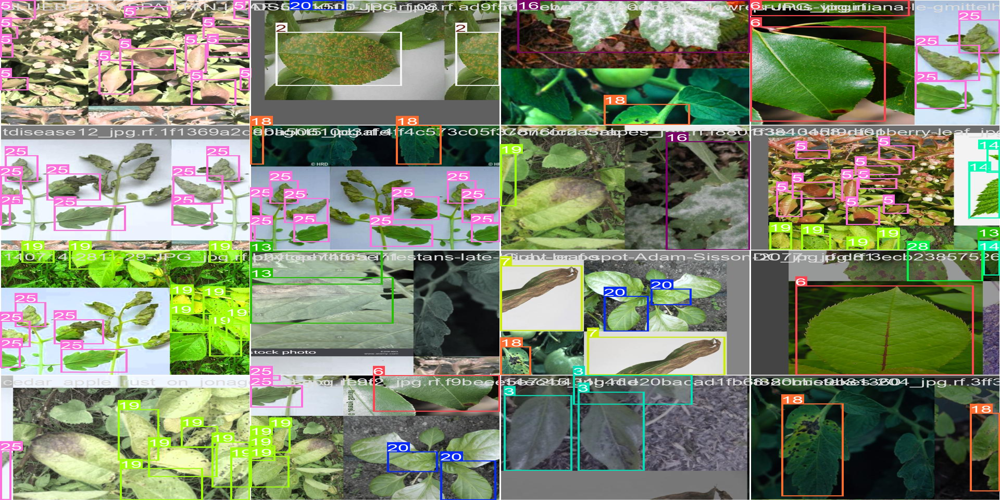

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/runs/detect/train3/train_batch1.jpg').resize((1000,500))

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/drive/MyDrive/new_projects/runs/detect/train3/weights/best.pt')

metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics YOLOv8.2.75 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.82it/s]


                   all        250        884      0.532      0.584      0.588      0.421
       Apple Scab Leaf          6         14      0.428      0.643      0.499      0.346
            Apple leaf          9         23       0.61      0.913      0.887      0.634
       Apple rust leaf         11         39       0.63      0.538      0.585      0.372
      Bell_pepper leaf          3         11      0.411      0.545      0.562      0.428
        Blueberry leaf         13        140       0.63      0.707      0.695      0.451
           Cherry leaf          2          7      0.056      0.143      0.152      0.091
   Corn Gray leaf spot          8          8      0.397      0.375      0.447      0.356
      Corn leaf blight         25         48      0.687      0.812      0.795      0.538
        Corn rust leaf         13         15      0.878      0.867      0.976      0.788
            Peach leaf          7         47      0.304      0.553      0.405      0.217
Potato leaf late blig

array([     0.3459,     0.63375,     0.37153,       0.421,     0.42814,     0.45065,    0.090963,     0.35641,     0.53809,     0.78824,     0.21677,       0.421,     0.16254,     0.12441,     0.66235,     0.89253,      0.4803,      0.6626,    0.068545,      0.3622,     0.32155,     0.30796,     0.45196,     0.28695,
           0.31476,      0.4586,       0.421,      0.5413,     0.62696])

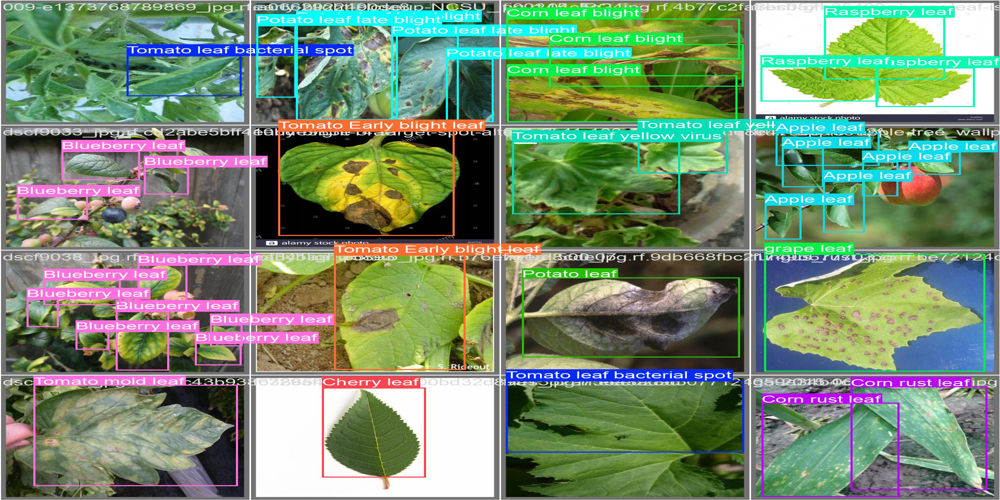

In [ ]:
Image.open(f'/content/drive/MyDrive/new_projects/runs/detect/val/val_batch0_labels.jpg').resize((1000,500))

**Image prediction**

In [ ]:
from PIL import Image
from ultralytics import YOLO
import ultralytics
import numpy as np
from cv2 import imread
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [ ]:
model = YOLO('/content/drive/MyDrive/new_projects/runs/detect/train3/weights/best.pt')

In [ ]:
results = model('/content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/test/images/20809116-standard_jpg.rf.09785317e0a7075baf994a91dfb77da9.jpg',show_conf=False,save=True)


image 1/1 /content/drive/MyDrive/new_projects/Plants-Diseases-Detection-and-Classification-12/test/images/20809116-standard_jpg.rf.09785317e0a7075baf994a91dfb77da9.jpg: 640x640 1 Tomato Septoria leaf spot, 14.3ms
Speed: 4.5ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


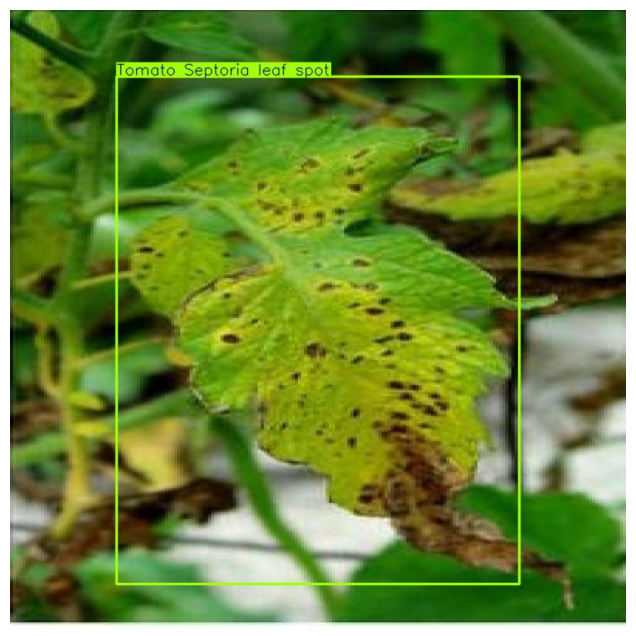

In [ ]:
# Load the predicted image
predicted_img_path = '/content/drive/MyDrive/new_projects/runs/detect/predict/20809116-standard_jpg.rf.09785317e0a7075baf994a91dfb77da9.jpg'
predicted_img = imread(predicted_img_path)
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(predicted_img)
plt.axis('off')  # Hide axes
plt.show()

In [3]:
!pip install gradio ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [4]:
import cv2
import numpy as np
from PIL import Image
from ultralytics import YOLO
import gradio as gr

# Load the YOLOv8 model
model = YOLO('/content/drive/MyDrive/new_projects/runs/detect/train3/weights/best.pt')

def predict_images(filepaths):
    if filepaths is None:
        return []

    output_images = []
    for filepath in filepaths:
        try:
            image = Image.open(filepath)
            img_np = np.array(image)
            img_np_bgr = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
            results = model(img_np_bgr)

            for result in results[0].boxes:
                x1, y1, x2, y2 = map(int, result.xyxy[0].cpu().numpy())
                label = int(result.cls.cpu().numpy())
                conf = float(result.conf.cpu().numpy())
                label_text = f"{model.names[label]}: {conf:.2f}"

                cv2.rectangle(img_np_bgr, (x1, y1), (x2, y2), (255, 0, 0), 2)
                cv2.putText(img_np_bgr, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            img_np_rgb = cv2.cvtColor(img_np_bgr, cv2.COLOR_BGR2RGB)
            output_image = Image.fromarray(img_np_rgb)
            output_images.append(output_image)

        except Exception as e:
            print(f"Error: {e}")
            output_images.append(None)

    return output_images

def predict_videos(filepath):
    if filepath is None:
        return None, None

    try:
        cap = cv2.VideoCapture(filepath)
        output_frames = []
        temp_input_video_path = '/content/input_video.mp4'

        # Save the input video (for display)
        cap_in = cv2.VideoWriter(temp_input_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 20,
                                 (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

        if not cap.isOpened():
            print("Error: Could not open video.")
            return None, None

        frame_count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            cap_in.write(frame)  # Save input frame

            # Make a prediction on each frame
            results = model(frame)

            for result in results[0].boxes:
                x1, y1, x2, y2 = map(int, result.xyxy[0].cpu().numpy())
                label = int(result.cls.cpu().numpy())
                conf = float(result.conf.cpu().numpy())
                label_text = f"{model.names[label]}: {conf:.2f}"

                # Draw the bounding box (Blue)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)
                # Draw the label (Red)
                cv2.putText(frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            output_frames.append(frame)
            frame_count += 1

        cap.release()
        cap_in.release()

        if frame_count == 0:
            print("Error: No frames processed.")
            return None, None

        # Save the processed video
        height, width, _ = output_frames[0].shape
        temp_output_video_path = '/content/processed_video.mp4'
        out = cv2.VideoWriter(temp_output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))
        for frame in output_frames:
            out.write(frame)
        out.release()

        print("Video processed and saved.")
        return temp_output_video_path

    except Exception as e:
        print(f"Error: {e}")
        return None

# Setup Gradio interface for multiple image and video input
def process_files(images, video):
    output_images = predict_images(images)
    processed_video = predict_videos(video) if video else None
    return output_images, video, processed_video

interface = gr.Interface(
    fn=process_files,
    inputs=[gr.File(file_count="multiple", type="filepath", label="Upload Images"),
            gr.Video(label="Upload Video")],  # Now taking video directly as input
    outputs=[gr.Gallery(label="Output Images"), gr.Video(label="Input Video"), gr.Video(label="Processed Video")],
)

interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://9c83bdbca4c185b4dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)



0: 640x640 5 Tomato leaf bacterial spots, 8.5ms
Speed: 32.2ms preprocess, 8.5ms inference, 1143.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Corn leaf blight, 7.5ms
Speed: 3.2ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Potato leaf late blight, 2 Potato leafs, 2 Soyabean leafs, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Tomato Septoria leaf spots, 2 Tomato leaf late blights, 7.4ms
Speed: 3.8ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


<ipython-input-4-c85d29f3774e>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(result.cls.cpu().numpy())
<ipython-input-4-c85d29f3774e>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(result.conf.cpu().numpy())



0: 384x640 3 Tomato leaf bacterial spots, 61.8ms
Speed: 3.4ms preprocess, 61.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 6.2ms
Speed: 3.1ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 6.2ms
Speed: 2.9ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Tomato leaf bacterial spot, 6.2ms
Speed: 2.9ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Tomato leaf bacterial spot, 6.3ms
Speed: 2.2ms preprocess, 6.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 6.0ms
Speed: 2.7ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 6.4ms
Speed: 2.7ms preprocess, 6.4ms inference, 1.0ms postprocess per image at shape (1

<ipython-input-4-c85d29f3774e>:71: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(result.cls.cpu().numpy())
<ipython-input-4-c85d29f3774e>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(result.conf.cpu().numpy())


Speed: 3.2ms preprocess, 6.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Tomato leaf bacterial spots, 6.2ms
Speed: 1.7ms preprocess, 6.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Tomato leaf bacterial spots, 6.8ms
Speed: 2.5ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Blueberry leaf, 2 Tomato leaf bacterial spots, 6.1ms
Speed: 2.8ms preprocess, 6.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Tomato leaf bacterial spot, 7.0ms
Speed: 3.3ms preprocess, 7.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 6.

/usr/local/lib/python3.10/dist-packages/gradio/components/video.py:327: UserWarning: Video does not have browser-compatible container or codec. Converting to mp4.
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9c83bdbca4c185b4dc.gradio.live
